In [1]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=6e18d93e2e71ebb998cf9b487ca417d3af6a3ff46bb700a118b1c9595da996b2
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
import keras
from keras.preprocessing import sequence
from keras.layers import Dense,LSTM, Dropout
import tensorflow as tf
import os
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf


Steps


Traditional method.
1.   feed each day's closing stock price in to LSMT
2.   train data on the closing stock price 

calculate Earning/loss
1. Create new array with each days earnings
2. train data on earnings
3. enter starting price and generate array of predicted earnings. 
4. add earnings to starting price



In [3]:
msft = yf.Ticker("MSFT")
data=msft.history(period="max")

In [5]:
data.info

<bound method DataFrame.info of               Open    High     Low   Close      Volume  Dividends  Stock Splits
Date                                                                           
1986-03-13    0.06    0.06    0.06    0.06  1031788800        0.0           0.0
1986-03-14    0.06    0.07    0.06    0.06   308160000        0.0           0.0
1986-03-17    0.06    0.07    0.06    0.07   133171200        0.0           0.0
1986-03-18    0.07    0.07    0.06    0.06    67766400        0.0           0.0
1986-03-19    0.06    0.06    0.06    0.06    47894400        0.0           0.0
...            ...     ...     ...     ...         ...        ...           ...
2020-09-17  200.05  204.33  199.96  202.91    34011300        0.0           0.0
2020-09-18  202.80  203.65  196.25  200.39    55225300        0.0           0.0
2020-09-21  197.19  202.71  196.38  202.54    39839700        0.0           0.0
2020-09-22  205.06  208.10  202.08  207.42    33428500        0.0           0.0
2020-09-

In [8]:
#iloc[row,column(not including date)]
closeVals = data.iloc[:,3:4].values
closeValsTrain=closeVals[5000:8600]
closeValsTest=closeVals[8601:]
print(closeVals)

[[6.0000e-02]
 [7.0000e-02]
 [7.0000e-02]
 ...
 [2.0271e+02]
 [2.0810e+02]
 [2.0810e+02]]


In [ ]:

sc=MinMaxScaler(feature_range=(0,1))
closeValsTrain=sc.fit_transform(closeValsTrain)
closeValsTrain.shape


(3600, 1)

In [ ]:
lenData=len(closeValsTrain)
print(lenData)

3600


In [ ]:
x_train=[]
y_train=[]
for i in range(20,lenData):
  x_train.append(closeValsTrain[i-20:i,0])
  y_train.append(closeValsTrain[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)



In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3580, 20, 1)

In [ ]:
RNN_UNITS=100
DROPOUT=0.2

def build_model(rnn_units, dropout):
  model = tf.keras.Sequential([
    LSTM(units = rnn_units, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    Dropout(dropout),
    LSTM(units = rnn_units, return_sequences = True),
    Dropout(dropout),
    LSTM(units = rnn_units, return_sequences = True),
    Dropout(dropout),
    LSTM(units = rnn_units),
    Dropout(dropout),
    Dense(units = 1)
  ])
  return model
model = build_model(RNN_UNITS, DROPOUT)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 20, 100)           40800     
_________________________________________________________________
dropout_12 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 20, 100)           80400     
_________________________________________________________________
dropout_13 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 20, 100)           80400     
_________________________________________________________________
dropout_14 (Dropout)         (None, 20, 100)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)              

In [ ]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
56/56 [==============================] - 1s 9ms/step - loss: 0.0057
Epoch 2/100
56/56 [==============================] - 1s 10ms/step - loss: 7.6827e-04
Epoch 3/100
56/56 [==============================] - 0s 8ms/step - loss: 7.6712e-04
Epoch 4/100
56/56 [==============================] - 0s 8ms/step - loss: 7.8677e-04
Epoch 5/100
56/56 [==============================] - 0s 8ms/step - loss: 6.5864e-04
Epoch 6/100
56/56 [==============================] - 0s 9ms/step - loss: 7.7408e-04
Epoch 7/100
56/56 [==============================] - 0s 8ms/step - loss: 6.2240e-04
Epoch 8/100
56/56 [==============================] - 0s 8ms/step - loss: 7.2611e-04
Epoch 9/100
56/56 [==============================] - 0s 8ms/step - loss: 7.1484e-04
Epoch 10/100
56/56 [==============================] - 0s 9ms/step - loss: 5.3574e-04
Epoch 11/100
56/56 [==============================] - 0s 8ms/step - loss: 6.2623e-04
Epoch 12/100
56/56 [==============================] - 0s 9ms/step - loss: 6.9

In [ ]:
real_stock_price = closeValsTest
inputs = closeVals[len(closeVals) - len(closeValsTest) - 20:]
inputs = inputs.reshape(-1,1)
print(inputs.size)
inputs = sc.transform(inputs)

97


In [ ]:

X_test = []
for i in range(20, 20+77):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price=pd.DataFrame(predicted_stock_price)


0     169.924774
1     169.326721
2     170.138458
3     171.576904
4     171.802078
         ...    
72    200.822433
73    200.079681
74    198.447144
75    197.852661
76    197.903931
Name: 0, Length: 77, dtype: float32


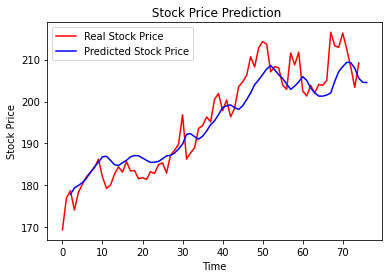

In [ ]:

# Visualising the results
plt.plot(real_stock_price[0:75], color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price[2:], color = 'blue', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
print(len(real_stock_price[0:76]))
print(len(predicted_stock_price[1:]))


76
76


In [ ]:
x=[inputs[90-20:90, 0]]
print(sc.inverse_transform(x))
x = np.array(x)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
predicted_stock_price=model.predict(x)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price=pd.DataFrame(predicted_stock_price)
print(predicted_stock_price)

[[214.32 213.67 207.07 208.35 208.04 203.92 202.88 211.6  208.75 211.75
  202.54 201.3  203.85 202.02 204.06 203.9  205.01 216.54 213.29 212.94]]
            0
0  208.333939


In [ ]:
#Use model to generate predictions

#take past 20 prices and make a prediction two week estimate  in to the furture and compare it to recent prices
def generate_closing_predictions(model, pastPrices):

  input_eval=[startVal]
  input_eval = tf.expand_dims(input_eval, 0)

  num_days = 14
  pred_generated = []

  model.reset_states()
  for i in range(num_days):
      predictions = model(input_eval)
      # remove the batch dimension
    
      predictions = tf.squeeze(predictions, 0)

      # using a categorical distribution to predict the character returned by the model
      #predictions = predictions / temperature
      #predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

      # We pass the predicted character as the next input to the model
      # along with the previous hidden state
      input_eval = tf.expand_dims([predictions], 0)

      pred_generated.append(predictions)

  return (pred_generated)

In [ ]:
inp = float(input("Input latest stock price: "))
print(generate_closing_predictions(model, inp))

Input latest stock price: 208.7
[<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.82049507], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.3733099], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.20908576], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.15762006], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.14254072], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13821688], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13698491], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13663454], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13653496], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13650665], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.1364986], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13649632], dt

##Conclusion 

When only looking at one feature, the closing price, although the LSTM layers were able to get a general ideal of the average increases and decreases in stock price it seems that when it comes to determining the probabality of determining where an increase or decrease will occur the algorithm chooses to follow the general trend of the data. hence why there seems to be a slight lag in the predicted prices. 

In the second experiment we should try to focus on incorperating all the other inputs such as high,lows, and quantity in to the Learning model. 


In [ ]:
def splitData(data, numTrain,numTest):
  totalLen=len(data)
  return [-numTrain-numTest:-numTest],[-numTest:]